 ## Вариант 13 
 https://www.kaggle.com/datasets/nancyalaswad90/yamana-gold-inc-stock-price?resource=download


In [89]:
import pandas as pd

data  = pd.read_csv("..//static//csv//Yamana_Gold_Inc._AUY.csv", sep=",", nrows=10000)

# Преобразование даты
data['Date'] = pd.to_datetime(data['Date'])

# Преобразование данных: создание новых признаков
data['Day_of_week'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data .columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Day_of_week', 'Month', 'Year'],
      dtype='object')

#1. Бизнес-цели для набора данных по акции компании Yamana Gold Inc.
Цель 1: Прогнозирование изменения цены акции компании.
Прогнозирование цен на акции является одной из ключевых задач в области финансов и инвестирования. Задача состоит в предсказании будущих изменений стоимости акции на основе исторических данных, таких как открытие и закрытие торгов, объемы торгов и другие показатели.

Цель 2: Оценка волатильности акций компании.
Измерение волатильности позволяет инвесторам оценить риск и принять решения по управлению капиталом. Задача заключается в прогнозировании уровня волатильности на основе исторической динамики цен, объемов торгов и других рыночных факторов.

#2. Цели технического проекта для каждой бизнес-цели
Цель 1: Прогнозирование изменения цены акции компании

Разработать модель машинного обучения для прогнозирования будущих цен акций на основе исторических данных.
Использовать регрессионные модели, такие как линейная регрессия или более сложные модели, например, LSTM (долгосрочная краткосрочная память) для временных рядов.
Цель 2: Оценка волатильности акций компании

Создать модель, которая будет прогнозировать волатильность на основе исторических данных о ценах.
Использовать методы статистического анализа, такие как вычисление стандартного отклонения, или методы машинного обучения для более точной оценки волатильности.

#3 Проверим датасет на пропуски и удалим при необходимости строки с недостающими данными

In [79]:

# Проверим на пропущенные значения
data.isnull().sum()

# Заполним пропуски или удалим строки с пропусками
data = data.dropna()

# Проверим, что данные очищены
data.isnull().sum()



Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Day_of_week    0
Month          0
Year           0
dtype: int64

Конструирование признаков

In [80]:
# Создаем новый признак - разницу между текущей и предыдущей ценой (Price_Change)
data['Price_Change'] = data['Close'].diff()

# Создадим скользящие средние для 5 и 20 дней
data['SMA_5'] = data['Close'].rolling(window=5).mean()
data['SMA_20'] = data['Close'].rolling(window=20).mean()

# Стандартное отклонение для 5 и 20 дней
data['STD_5'] = data['Close'].rolling(window=5).std()
data['STD_20'] = data['Close'].rolling(window=20).std()

data.head()


Date      Open      High       Low     Close  Adj Close  Volume  \
0 2001-06-22  3.428571  3.428571  3.428571  3.428571   2.806002       0   
1 2001-06-25  3.428571  3.428571  3.428571  3.428571   2.806002       0   
2 2001-06-26  3.714286  3.714286  3.714286  3.714286   3.039837       0   
3 2001-06-27  3.714286  3.714286  3.714286  3.714286   3.039837       0   
4 2001-06-28  3.714286  3.714286  3.714286  3.714286   3.039837       0   

   Day_of_week  Month  Year  Price_Change  SMA_5  SMA_20     STD_5  STD_20  
0            4      6  2001           NaN    NaN     NaN       NaN     NaN  
1            0      6  2001      0.000000    NaN     NaN       NaN     NaN  
2            1      6  2001      0.285715    NaN     NaN       NaN     NaN  
3            2      6  2001      0.000000    NaN     NaN       NaN     NaN  
4            3      6  2001      0.000000    3.6     NaN  0.156493     NaN

 Разделение данных на обучающую, контрольную и тестовую выборки

In [81]:
from sklearn.model_selection import train_test_split

# Преобразуем колонку 'Date' в тип datetime для правильного сортирования
data['Date'] = pd.to_datetime(data['Date'])

# Сортируем данные по дате, чтобы не нарушить временную зависимость
data = data.sort_values(by='Date')

# Отделяем целевую переменную (например, Price_Change) и признаки
X = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_5', 'SMA_20', 'STD_5', 'STD_20']]
y = data['Price_Change']

# Разделение на обучающую, контрольную и тестовую выборки (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Проверка размеров выборок
(X_train.shape, X_val.shape, X_test.shape)


((3150, 10), (1050, 10), (1051, 10))

Конструирование признаков для решения задач

In [82]:
# Признаки для задачи прогнозирования изменений цен
data['Price_Change'] = data['Close'].diff()

# Скользящие средние и стандартное отклонение
data['SMA_5'] = data['Close'].rolling(window=5).mean()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['STD_5'] = data['Close'].rolling(window=5).std()
data['STD_20'] = data['Close'].rolling(window=20).std()

# Признаки для оценки волатильности
data['Volatility'] = data['Close'].rolling(window=5).std()



Подготовка признаков: one-hot encoding, дискретизация, синтез признаков, масштабирование
One-hot encoding: Применим для категориальных признаков (например, день недели).
Масштабирование: Стандартизируем числовые признаки.

In [83]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Преобразуем дату, если это еще не сделано
data['Date'] = pd.to_datetime(data['Date'])

# Добавим дополнительные признаки (день недели и месяц)
data['Day_of_week'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month

# Проверим, что эти столбцы добавлены
print(data[['Day_of_week', 'Month']].head())

# Выбираем признаки и целевую переменную
X = data[['Close', 'SMA_5', 'SMA_20', 'STD_5', 'STD_20', 'Day_of_week', 'Month']]
y = data['Price_Change']

# Применяем one-hot encoding для категориальных признаков (Day_of_week и Month)
X = pd.get_dummies(X, columns=['Day_of_week', 'Month'], drop_first=True)

# Масштабирование числовых признаков (Close, SMA, STD)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Преобразуем обратно в DataFrame для удобства
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Проверим результат
X_scaled_df.head()


   Day_of_week  Month
0            4      6
1            0      6
2            1      6
3            2      6
4            3      6


Close     SMA_5  SMA_20     STD_5  STD_20  Day_of_week_1  Day_of_week_2  \
0 -0.721096       NaN     NaN       NaN     NaN      -0.507666      -0.507962   
1 -0.721096       NaN     NaN       NaN     NaN      -0.507666      -0.507962   
2 -0.660890       NaN     NaN       NaN     NaN       1.969800      -0.507962   
3 -0.660890       NaN     NaN       NaN     NaN      -0.507666       1.968649   
4 -0.660890 -0.686033     NaN -0.269917     NaN      -0.507666      -0.507962   

   Day_of_week_3  Day_of_week_4  Month_2   Month_3   Month_4   Month_5  \
0      -0.502320       1.999048 -0.28793 -0.309491 -0.300916 -0.297137   
1      -0.502320      -0.500238 -0.28793 -0.309491 -0.300916 -0.297137   
2      -0.502320      -0.500238 -0.28793 -0.309491 -0.300916 -0.297137   
3      -0.502320      -0.500238 -0.28793 -0.309491 -0.300916 -0.297137   
4       1.990763      -0.500238 -0.28793 -0.309491 -0.300916 -0.297137   

    Month_6  Month_7   Month_8   Month_9  Month_10  Month_11  Month_12  
0  3.335719 -0.30429 -0.311702 -0.296377 -0.311335 -0.298274 -0.303543  
1  3.335719 -0.30429 -0.311702 -0.296377 -0.311335 -0.298274 -0.303543  
2  3.335719 -0.30429 -0.311702 -0.296377 -0.311335 -0.298274 -0.303543  
3  3.335719 -0.30429 -0.311702 -0.296377 -0.311335 -0.298274 -0.303543  
4  3.335719 -0.30429 -0.311702 -0.296377 -0.311335 -0.298274 -0.303543

In [84]:
import featuretools as ft

# Создаем сущности для Featuretools
es = ft.EntitySet(id="stock_prices")
es = es.add_dataframe(dataframe_name="stock_data", dataframe=data, index="Date")

# Автоматическое создание признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="stock_data")


c:\Users\alexk\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


#Оценка качества признаков
Оценка признаков на основе предсказательной способности модели и других критериев.

In [ ]:
# Проверим размеры данных
print(X_scaled_df.shape[0])  # Количество строк в X_scaled_df
print(y_train.shape[0])       # Количество строк в y_train

# Приводим индексы к одному виду
y_train = y_train.reset_index(drop=True)
X_scaled_df = X_scaled_df.reset_index(drop=True)

# После этого продолжим обучение модели
model = LinearRegression()
model.fit(X_scaled_df, y_train)

# Прогнозирование и оценка качества
y_pred = model.predict(X_scaled_df)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


5251
3150


AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

Визуализируем

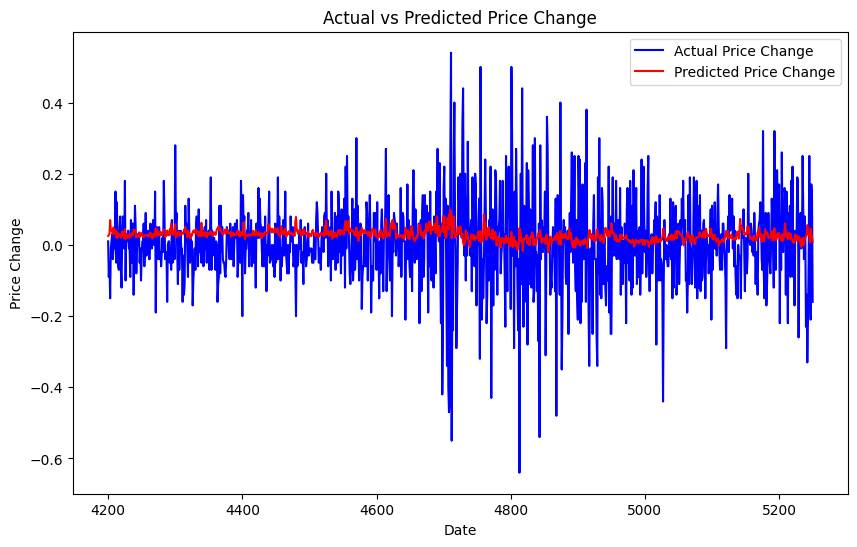

In [ ]:
import matplotlib.pyplot as plt

# Визуализируем фактические и предсказанные значения
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Price Change', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price Change', color='red')
plt.legend()
plt.title("Actual vs Predicted Price Change")
plt.xlabel("Date")
plt.ylabel("Price Change")
plt.show()
